<a href="https://colab.research.google.com/github/ManelAnsari/-Atelier_S.O.A-Atelier-02-Spring-Boot--DSI31/blob/main/lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2024-03-27 05:27:21--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.156.63, 16.12.36.59, 52.219.158.27, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.156.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  20.5MB/s    in 8.2s    

2024-03-27 05:27:30 (18.1 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

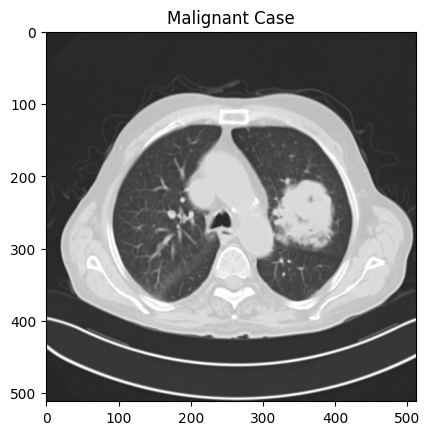

In [4]:
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg")
plt.title("Malignant Case")
plt.imshow(img)

In [5]:
img_width = 64
img_height = 64

In [6]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [7]:
train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")

Found 970 images belonging to 3 classes.


In [8]:
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")

Found 107 images belonging to 3 classes.


In [9]:
train_data_generator.next()[1]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.4))

model.add(Dense(3, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [13]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights = True)]

In [14]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 6s 80ms/step - loss: 0.9692 - accuracy: 0.4835 - val_loss: 0.9466 - val_accuracy: 0.4393
Epoch 2/50
61/61 [==============================] - 4s 71ms/step - loss: 0.8252 - accuracy: 0.6464 - val_loss: 0.8962 - val_accuracy: 0.5607
Epoch 3/50
61/61 [==============================] - 5s 81ms/step - loss: 0.6201 - accuracy: 0.7691 - val_loss: 0.9387 - val_accuracy: 0.6262
Epoch 4/50
61/61 [==============================] - 5s 81ms/step - loss: 0.5143 - accuracy: 0.8062 - val_loss: 0.8605 - val_accuracy: 0.6262
Epoch 5/50
61/61 [==============================] - 5s 79ms/step - loss: 0.4049 - accuracy: 0.8485 - val_loss: 0.9625 - val_accuracy: 0.5888
Epoch 6/50
61/61 [==============================] - 4s 70ms/step - loss: 0.3060 - accuracy: 0.8784 - val_loss: 0.7890 - val_accuracy: 0.7290
Epoch 7/50
61/61 [==============================] - 5s 78ms/step - loss: 0.2618 - accuracy: 0.8938 - val_loss: 0.8158 - val_accuracy: 0.6822
Epoch 8/50
61

In [15]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Test", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")

Found 20 images belonging to 3 classes.


In [16]:
test_data_generator.next()[1]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

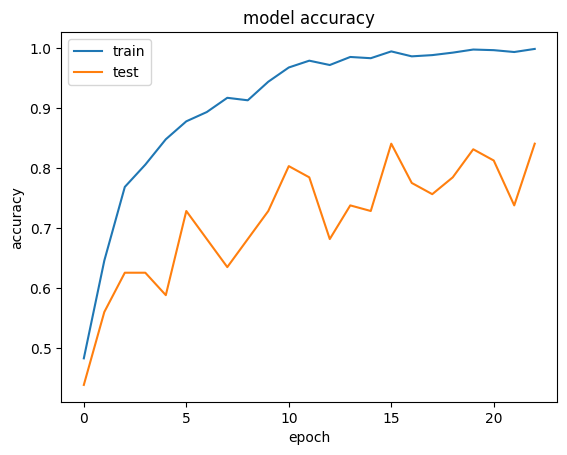

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

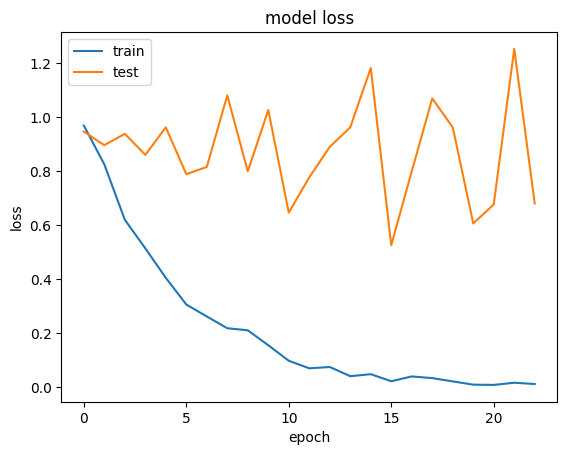

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(5):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

1/1 [==============================] - 0s 15ms/step


In [20]:
cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:5]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1

print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'Benign', 1: 'Normal', 2: 'Normal', 3: 'Malignant', 4: 'Benign'}
PREDICTIONS: {0: 'Malignant', 1: 'Normal', 2: 'Normal', 3: 'Malignant', 4: 'Malignant'}


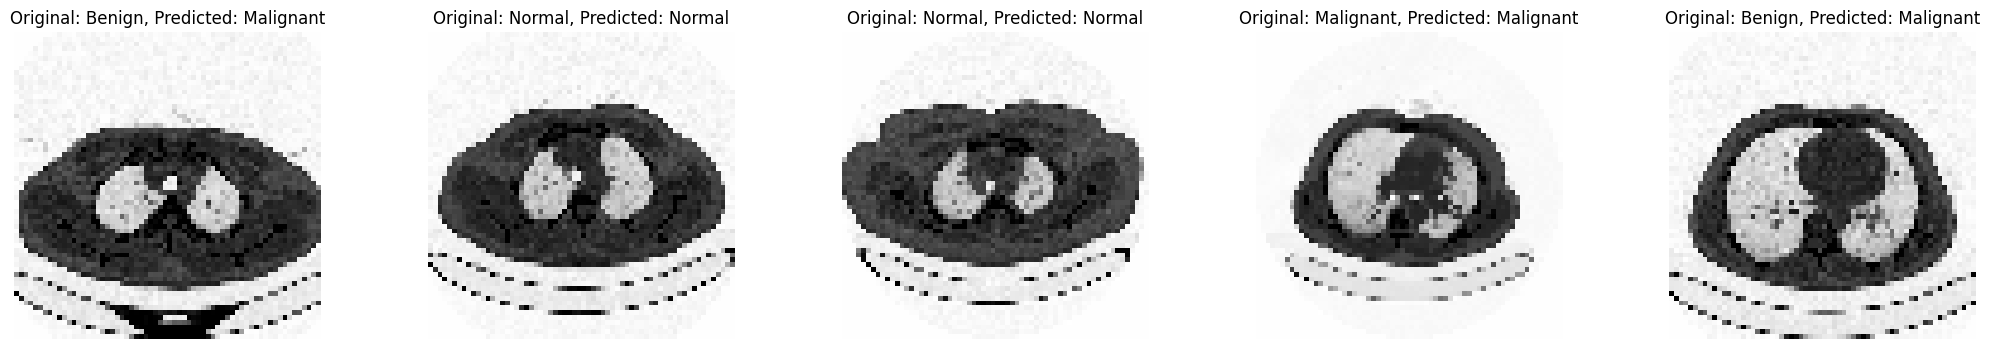

In [21]:
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()

In [22]:
model.save("lung_cancer_prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


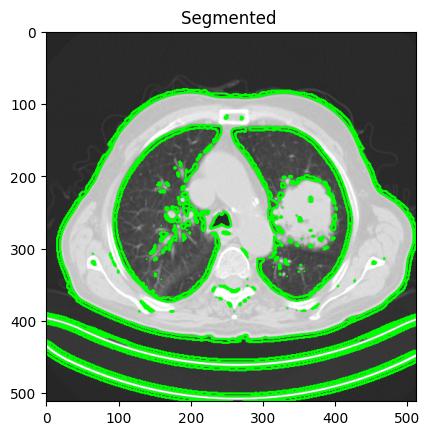

In [31]:
# prompt: segmennter image la zone de cancer

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to segment the cancer region
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 16)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)

# Display the segmented image
plt.imshow(img)
plt.title("Segmented ")
plt.show()


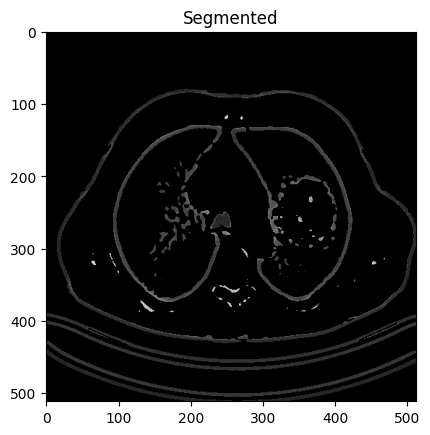

In [36]:
# prompt: segmentter nodules  pas tout le shapes

# Load the image
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to segment the cancer region
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 16)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask to isolate the cancer region
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)

# Apply the mask to the original image
segmented_img = cv2.bitwise_and(img, mask)

# Display the segmented image
plt.imshow(segmented_img)
plt.title("Segmented")
plt.show()
